Better Visualizations of the questions posed are available on the following Tableau Links:

Page 1: https://public.tableau.com/views/ICD_Analysis/ICDDashboard?:language=en-GB&:display_count=n&:origin=viz_share_link - Questions 2 & 4 Visualizations.

Page 2: https://public.tableau.com/views/ICD_Analysis_Page_2/RankDashboard?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link - Questions 1 & 3 Visualizations.

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sqlite3 as sq3

In [2]:
url_csv = "https://drive.google.com/file/d/1UYDZqaOGVRzEiwWEhDVli8RjraECtnqI/view?usp=sharing"
url_csv = "https://drive.google.com/uc?id="+url_csv.split('/')[-2]
general_info_csv = pd.read_csv(url_csv)
general_info_csv.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
0,010018,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233,Jefferson,(205) 325-8100,Acute Care Hospitals,Voluntary non-profit - Private,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
1,010051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462,Greene,(205) 372-3388,Acute Care Hospitals,Government - Local,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
2,010102,J PAUL JONES HOSPITAL,317 MCWILLIAMS AVENUE,CAMDEN,AL,36726,Wilcox,(334) 682-4131,Acute Care Hospitals,Voluntary non-profit - Other,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
3,030074,SELLS HOSPITAL,"HIGHWAY 86, AT TOPAWA ROAD",SELLS,AZ,85634,Pima,(520) 362-7003,Acute Care Hospitals,Tribal,...,0,1,0,NaN,8,Not Available,5.0,14,Not Available,5.0
4,030136,DIGNITY HEALTH - ARIZONA GENERAL HOSPITAL,7171 SOUTH 51ST AVENUE,LAVEEN,AZ,85339,Maricopa,(623) 584-5100,Acute Care Hospitals,Proprietary,...,0,1,0,NaN,8,Not Available,5.0,14,9,NaN


In [3]:
url_in2011 = "https://drive.google.com/file/d/1AvSYogGjyZBbf0yH-v-D5PwnsQjU7WPR/view?usp=sharing"
url_in2011 = "https://drive.google.com/uc?id="+url_in2011.split('/')[-2]
in2011 = pd.read_json(url_in2011)
in2011.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.400000,2901.266667,2075.400000,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,35,2749.942857,4784.514286,4018.542857,T79
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3133.583333,3579.583333,2738.583333,I02
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,18,3282.277778,3790.166667,3214.222222,D18
4,370171,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,74464,OK - Tulsa,11,3534.000000,6441.000000,5520.636364,P12


In [4]:
url_in2012 = "https://drive.google.com/file/d/1ku3onXFwq78Sw_bnppnl7a0rVF7H-Zbu/view?usp=sharing"
url_in2012 = "https://drive.google.com/uc?id="+url_in2012.split('/')[-2]
in2012 = pd.read_json(url_in2012)
in2012.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,2516.250000,4253.083333,3773.416667,D22
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,2903.250000,2838.000000,2260.000000,G81
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,22,2987.681818,4831.272727,4098.909091,T79
3,370178,MEMORIAL HOSPITAL OF STILWELL,1401 WEST LOCUST,STILWELL,OK,74960,OK - Tulsa,19,3440.263158,4058.105263,3273.473684,B95
4,370178,MEMORIAL HOSPITAL OF STILWELL,1401 WEST LOCUST,STILWELL,OK,74960,OK - Tulsa,13,3718.461538,5402.384615,4783.615385,D29


In [5]:
url_in2013 = "https://drive.google.com/file/d/1NUvtJbxbY1EPtm0bwEhYfLWNINYE0x5-/view?usp=sharing"
url_in2013 = "https://drive.google.com/uc?id="+url_in2013.split('/')[-2]
in2013 = pd.read_json(url_in2013)
in2013.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,2618.166667,2986.750000,2007.083333,G81
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3136.666667,3754.833333,2871.500000,J02
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,11,3215.000000,3685.454545,2939.636364,D28
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,26,3240.269231,4103.500000,3264.269231,D31
4,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,14,3678.928571,3825.357143,3068.214286,D18


In [6]:
path = "/content/outpatient_charges.db"
conn = sq3.connect(path)

In [7]:
query = "SELECT * FROM outpatient_charges_2011"
out_2011 = pd.read_sql(query,conn)
out_2011.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294


In [8]:
query = "SELECT * FROM outpatient_charges_2012"
out_2012 = pd.read_sql(query,conn)
out_2012.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,37,324.739730,52.120270
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,301.517350,98.425032
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,12,3963.837500,567.880000
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,155,597.554839,96.136387
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,84,663.985714,103.934881


In [9]:
query = "SELECT * FROM outpatient_charges_2013"
out_2013 = pd.read_sql(query,conn)
out_2013.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments
0,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,0013 - Level II Debridement & Destruction,145,261.757931,80.738966
1,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,0015 - Level III Debridement & Destruction,341,289.237126,121.001730
2,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,0078 - Level III Pulmonary Treatment,269,892.490706,113.087695
3,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,0096 - Level II Noninvasive Physiologic Studies,13,837.692308,125.223846
4,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99519,0204 - Level I Nerve Injections,12,1503.148333,209.373333


In [10]:
dfs = [general_info_csv,in2011,in2012,in2013,out_2011,out_2012,out_2013]

for i in dfs:
  print(i.shape[0], " rows and ", i.shape[1], " columns.")

5336  rows and  38  columns.
10000  rows and  12  columns.
10000  rows and  12  columns.
10000  rows and  12  columns.
43372  rows and  10  columns.
43783  rows and  10  columns.
44355  rows and  10  columns.


In [11]:
general_info_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            5336 non-null   object 
 1   hospital_name                                          5336 non-null   object 
 2   address                                                5336 non-null   object 
 3   city                                                   5336 non-null   object 
 4   state                                                  5336 non-null   object 
 5   zip_code                                               5336 non-null   int64  
 6   county_name                                            5336 non-null   object 
 7   phone_number                                           5336 non-null   object 
 8   hospital_type                                   

In [12]:
in2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  int64  
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  int64  
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  int64  
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [13]:
in2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  int64  
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  int64  
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  int64  
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [14]:
in2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  int64  
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  int64  
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  int64  
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [15]:
out_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43372 non-null  int64  
 1   provider_name                        43372 non-null  object 
 2   provider_street_address              43372 non-null  object 
 3   provider_city                        43372 non-null  object 
 4   provider_state                       43372 non-null  object 
 5   provider_zipcode                     43372 non-null  int64  
 6   apc                                  43372 non-null  object 
 7   outpatient_services                  43372 non-null  int64  
 8   average_estimated_submitted_charges  43372 non-null  float64
 9   average_total_payments               43372 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [16]:
out_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43783 entries, 0 to 43782
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43783 non-null  int64  
 1   provider_name                        43783 non-null  object 
 2   provider_street_address              43783 non-null  object 
 3   provider_city                        43783 non-null  object 
 4   provider_state                       43783 non-null  object 
 5   provider_zipcode                     43783 non-null  int64  
 6   apc                                  43783 non-null  object 
 7   outpatient_services                  43783 non-null  int64  
 8   average_estimated_submitted_charges  43783 non-null  float64
 9   average_total_payments               43783 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB


In [17]:
out_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44355 entries, 0 to 44354
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          44355 non-null  int64  
 1   provider_name                        44355 non-null  object 
 2   provider_street_address              44355 non-null  object 
 3   provider_city                        44355 non-null  object 
 4   provider_state                       44355 non-null  object 
 5   provider_zipcode                     44355 non-null  int64  
 6   apc                                  44355 non-null  object 
 7   outpatient_services                  44355 non-null  int64  
 8   average_estimated_submitted_charges  44355 non-null  float64
 9   average_total_payments               44355 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.4+ MB


# DATA CLEANING

In [18]:
general_info_csv.isna().sum()

provider_id                                                 0
hospital_name                                               0
address                                                     0
city                                                        0
state                                                       0
zip_code                                                    0
county_name                                                 0
phone_number                                                0
hospital_type                                               0
hospital_ownership                                          0
emergency_services                                          0
meets_criteria_for_promoting_interoperability_of_ehrs    1450
hospital_overall_rating                                     0
hospital_overall_rating_footnote                         3270
mortality_group_measure_count                               0
facility_mortaility_measures_count                          0
mortalit

The required columns have no nulls, therefore we can proceed

In [19]:
in2011.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

In [20]:
in2012.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

In [21]:
in2013.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

In [22]:
out_2011.isna().sum()

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64

In [23]:
out_2012.isna().sum()

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64

In [24]:
out_2013.isna().sum()

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64

In [25]:
general_info_csv.duplicated().sum()

0

In [26]:
in2011.duplicated().sum()

0

In [27]:
in2012.duplicated().sum()

0

In [28]:
in2013.duplicated().sum()

0

In [29]:
out_2011.duplicated().sum()

0

In [30]:
out_2012.duplicated().sum()

0

In [31]:
out_2013.duplicated().sum()

0

In [32]:
in2011["year"] = 2011
in2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  int64  
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  int64  
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  int64  
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [33]:
in2011["year"].value_counts()

2011    10000
Name: year, dtype: int64

In [34]:
in2012["year"] = 2012
in2013["year"] = 2013
in2012["year"].value_counts(), in2013["year"].value_counts()

(2012    10000
 Name: year, dtype: int64, 2013    10000
 Name: year, dtype: int64)

In [35]:
out_2011["year"] = 2011
out_2012["year"] = 2012
out_2013["year"] = 2013
print(out_2011["year"].value_counts(), out_2012["year"].value_counts(), out_2013["year"].value_counts())

2011    43372
Name: year, dtype: int64 2012    43783
Name: year, dtype: int64 2013    44355
Name: year, dtype: int64


In [36]:
in_ = [in2011,in2012,in2013]
inpatient = pd.concat(in_, ignore_index=True)
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           30000 non-null  int64  
 1   provider_name                         30000 non-null  object 
 2   provider_street_address               30000 non-null  object 
 3   provider_city                         30000 non-null  object 
 4   provider_state                        30000 non-null  object 
 5   provider_zipcode                      30000 non-null  int64  
 6   hospital_referral_region_description  30000 non-null  object 
 7   total_discharges                      30000 non-null  int64  
 8   average_covered_charges               30000 non-null  float64
 9   average_total_payments                30000 non-null  float64
 10  average_medicare_payments             30000 non-null  float64
 11  icd_category   

In [37]:
out = [out_2011,out_2012,out_2013]
outpatient = pd.concat(out, ignore_index=True)
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131510 entries, 0 to 131509
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   provider_id                          131510 non-null  int64  
 1   provider_name                        131510 non-null  object 
 2   provider_street_address              131510 non-null  object 
 3   provider_city                        131510 non-null  object 
 4   provider_state                       131510 non-null  object 
 5   provider_zipcode                     131510 non-null  int64  
 6   apc                                  131510 non-null  object 
 7   outpatient_services                  131510 non-null  int64  
 8   average_estimated_submitted_charges  131510 non-null  float64
 9   average_total_payments               131510 non-null  float64
 10  year                                 131510 non-null  int64  
dtypes: float64(2)

# EXPLORATORY DATA ANALYSIS

## 1. UNIVARIATE

### a.) NUMERICAL

**INPATIENT**

In [38]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           30000 non-null  int64  
 1   provider_name                         30000 non-null  object 
 2   provider_street_address               30000 non-null  object 
 3   provider_city                         30000 non-null  object 
 4   provider_state                        30000 non-null  object 
 5   provider_zipcode                      30000 non-null  int64  
 6   hospital_referral_region_description  30000 non-null  object 
 7   total_discharges                      30000 non-null  int64  
 8   average_covered_charges               30000 non-null  float64
 9   average_total_payments                30000 non-null  float64
 10  average_medicare_payments             30000 non-null  float64
 11  icd_category   

In [39]:
in_numeric = list(inpatient.columns)
in_categoric = ["provider_name","provider_street_address","provider_city","provider_state","hospital_referral_region_description","icd_category"]
in_numeric = [x for x in in_numeric if x not in in_categoric]
in_numeric

['provider_id',
 'provider_zipcode',
 'total_discharges',
 'average_covered_charges',
 'average_total_payments',
 'average_medicare_payments',
 'year']

In [40]:
df_inumeric = inpatient[in_numeric]
df_inumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   provider_id                30000 non-null  int64  
 1   provider_zipcode           30000 non-null  int64  
 2   total_discharges           30000 non-null  int64  
 3   average_covered_charges    30000 non-null  float64
 4   average_total_payments     30000 non-null  float64
 5   average_medicare_payments  30000 non-null  float64
 6   year                       30000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 MB


In [41]:
def unique_count(columns,data):
  for i in columns:
    print(i)
    print(data[i].nunique())
    print("***********")

unique_count(in_numeric,df_inumeric)

provider_id
236
***********
provider_zipcode
213
***********
total_discharges
401
***********
average_covered_charges
29968
***********
average_total_payments
29693
***********
average_medicare_payments
29804
***********
year
3
***********


provider id is not a unique identifier column

In [42]:
df_inumeric.describe()

,provider_id,provider_zipcode,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,year
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,222381.404733,52469.676067,41.535367,39585.829397,9892.804834,8538.803489,2012.00000
std,134358.827610,25293.429768,50.317534,34566.060712,7728.172041,7274.064303,0.81651
min,10022.000000,10451.000000,11.000000,2459.400000,2816.894737,1220.000000,2011.00000
25%,100209.000000,33134.000000,17.000000,18250.891305,5335.604532,4224.109951,2011.00000
50%,160028.000000,46402.000000,26.000000,28687.680555,7314.738329,6144.742326,2012.00000
75%,370001.000000,74402.000000,47.000000,47727.431818,11656.055227,10229.843475,2013.00000
max,460041.000000,97914.000000,1328.000000,445163.550000,131187.357100,130466.571400,2013.00000


In [43]:
def statistics(columns,data):
  for i in columns:
    print(i)
    print("Mode: ", data[i].mode())
    print("Range: ", data[i].max() - data[i].min())
    print("Variance: ", data[i].var())
    print("Skewness: ", data[i].skew())
    print("Kurtosis: ", data[i].kurt())
    print("**********\n")
  
statistics(in_numeric, df_inumeric)

provider_id
Mode:  0    370091
dtype: int64
Range:  450019
Variance:  18052294556.800594
Skewness:  0.2751405555272116
Kurtosis:  -1.4499631838047142
**********

provider_zipcode
Mode:  0    74104
dtype: int64
Range:  87463
Variance:  639757589.4165022
Skewness:  0.12095263173080377
Kurtosis:  -1.2687726053228894
**********

total_discharges
Mode:  0    11
dtype: int64
Range:  1317
Variance:  2531.8542110059902
Skewness:  7.106090658778246
Kurtosis:  98.88852118315661
**********

average_covered_charges
Mode:  0      7200.333333
1     10929.500000
2     11394.000000
3     11417.181820
4     12609.000000
5     12869.750000
6     13878.750000
7     16074.454550
8     16255.000000
9     17657.000000
10    19099.823530
11    19132.000000
12    19183.000000
13    19216.000000
14    20009.000000
15    21128.722220
16    21295.500000
17    21742.000000
18    21783.250000
19    22239.250000
20    22269.000000
21    23067.600000
22    26103.000000
23    26887.000000
24    27505.333330
25    283

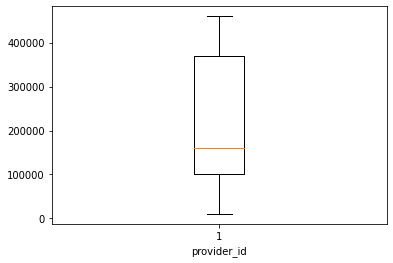

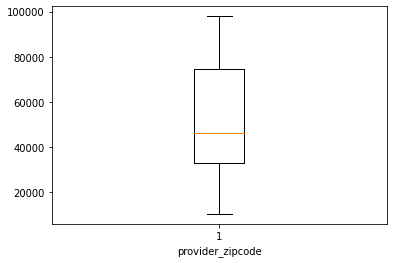

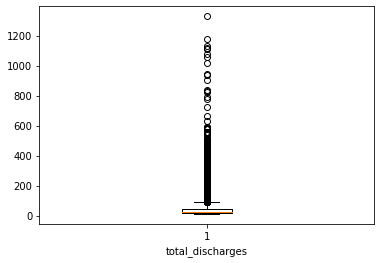

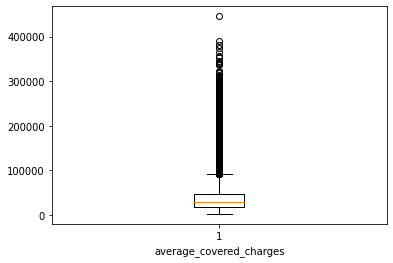

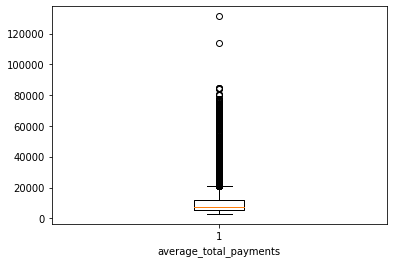

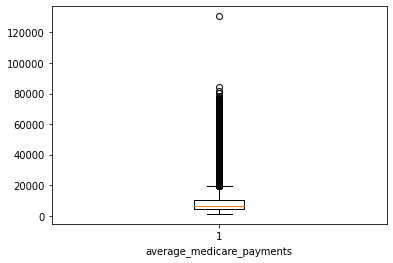

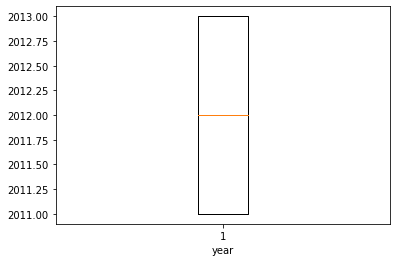

In [44]:
def boxplots(columns, data):
  for i in columns:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

boxplots(in_numeric,df_inumeric)

There seems to be alot of outliers from the columns total_discharges, average_covered_charges, average_total_payments and average_medicare_payments.

In [45]:
# Q1 = df_inumeric.quantile(0.25)
# Q3 = df_inumeric.quantile(0.75)
# print(Q3,Q1)
# IQR = Q3 - Q1
# print(IQR)
# lower_bound = Q1 - (0.5 * IQR)
# upper_bound = Q3 + (0.5 * IQR)
# print(upper_bound, lower_bound)
# print(df_inumeric.max(), df_inumeric.min())
# filter =  (df_inumeric > upper_bound) #(df_inumeric["average_total_payments"] >= lower_bound) 
# print(filter.shape[0])
# # outliers = (filter.shape[0] / df_inumeric.shape[0]) * 100
# # print("average_total_payments")
# # print("Outlier Percentage: ", outliers)
# # print("\n")

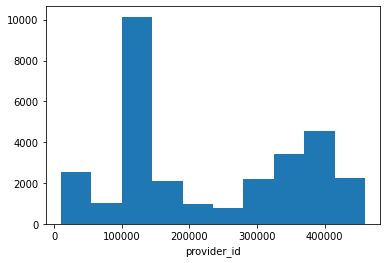

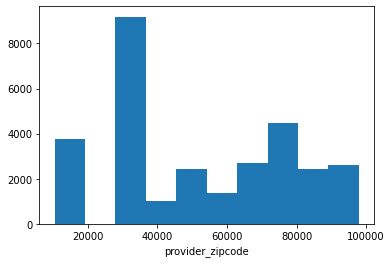

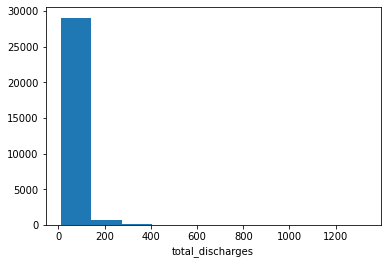

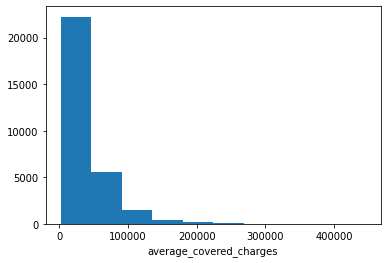

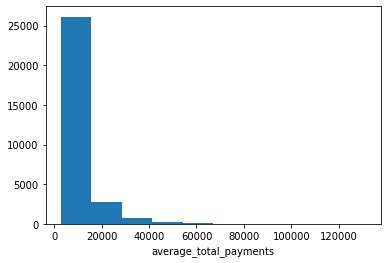

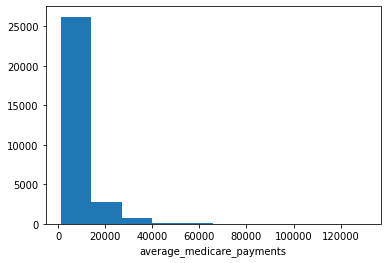

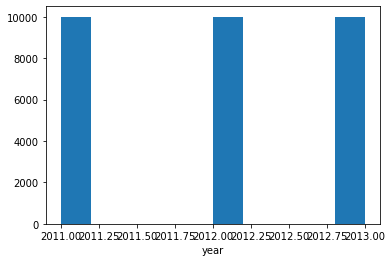

In [46]:
for i in in_numeric:
  plt.hist(df_inumeric[i])
  plt.xlabel(i)
  plt.show()

***CONCLUSIONS***

The data is skewed rather than having outliers on the said columns.

Additionally, provider_id 370091 which corresponds to SAINT FRANCIS HOSPITAL INC seems to be the most active proviser of inpatient services while zipcode 74104 which corresponds to TULSA city seems to be the city with the most inpatient services provided.

**OUTPATIENT**

In [47]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131510 entries, 0 to 131509
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   provider_id                          131510 non-null  int64  
 1   provider_name                        131510 non-null  object 
 2   provider_street_address              131510 non-null  object 
 3   provider_city                        131510 non-null  object 
 4   provider_state                       131510 non-null  object 
 5   provider_zipcode                     131510 non-null  int64  
 6   apc                                  131510 non-null  object 
 7   outpatient_services                  131510 non-null  int64  
 8   average_estimated_submitted_charges  131510 non-null  float64
 9   average_total_payments               131510 non-null  float64
 10  year                                 131510 non-null  int64  
dtypes: float64(2)

In [48]:
out_numeric = list(outpatient.columns)
out_categoric = ["provider_name","provider_street_address","provider_city","provider_state","apc"]
out_numeric = [x for x in out_numeric if x not in out_categoric]
out_numeric

['provider_id',
 'provider_zipcode',
 'outpatient_services',
 'average_estimated_submitted_charges',
 'average_total_payments',
 'year']

In [49]:
df_outnumeric = outpatient[out_numeric]
df_outnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131510 entries, 0 to 131509
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   provider_id                          131510 non-null  int64  
 1   provider_zipcode                     131510 non-null  int64  
 2   outpatient_services                  131510 non-null  int64  
 3   average_estimated_submitted_charges  131510 non-null  float64
 4   average_total_payments               131510 non-null  float64
 5   year                                 131510 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 6.0 MB


In [50]:
unique_count(out_numeric, df_outnumeric)

provider_id
3207
***********
provider_zipcode
2978
***********
outpatient_services
6392
***********
average_estimated_submitted_charges
128327
***********
average_total_payments
122585
***********
year
3
***********


In [51]:
df_outnumeric.describe()

,provider_id,provider_zipcode,outpatient_services,average_estimated_submitted_charges,average_total_payments,year
count,131510.000000,131510.000000,131510.000000,131510.000000,131510.000000,131510.000000
mean,265523.507574,49036.771713,668.870367,1535.356719,260.738008,2012.007475
std,152545.963063,27543.419346,3752.915657,1920.264035,252.150453,0.816715
min,10001.000000,1040.000000,11.000000,2.922778,7.305000,2011.000000
25%,140052.000000,28602.000000,42.000000,291.938488,75.416224,2011.000000
50%,260085.000000,46514.000000,128.000000,738.013454,139.214232,2012.000000
75%,390093.000000,73070.000000,361.000000,2180.434688,387.481618,2013.000000
max,670077.000000,99801.000000,265886.000000,44593.078750,2121.454211,2013.000000


In [52]:
statistics(out_numeric,df_outnumeric)

provider_id
Mode:  0    50599
dtype: int64
Range:  660076
Variance:  23270270846.899975
Skewness:  0.060831921492151574
Kurtosis:  -1.1148517906602418
**********

provider_zipcode
Mode:  0    40202
dtype: int64
Range:  98761
Variance:  758639949.2436945
Skewness:  0.1050591522389203
Kurtosis:  -1.054366421460923
**********

outpatient_services
Mode:  0    11
dtype: int64
Range:  265875
Variance:  14084375.929207427
Skewness:  22.927605043809734
Kurtosis:  873.376709150186
**********

average_estimated_submitted_charges
Mode:  0    250.0
dtype: float64
Range:  44590.155972222
Variance:  3687413.9657429717
Skewness:  2.9594325421349406
Kurtosis:  17.515829383553783
**********

average_total_payments
Mode:  0    119.35
dtype: float64
Range:  2114.1492110000004
Variance:  63579.85081555733
Skewness:  1.6087732155490893
Kurtosis:  3.219676803656954
**********

year
Mode:  0    2013
dtype: int64
Range:  2
Variance:  0.6670239478161425
Skewness:  -0.013736477877851446
Kurtosis:  -1.5006776191

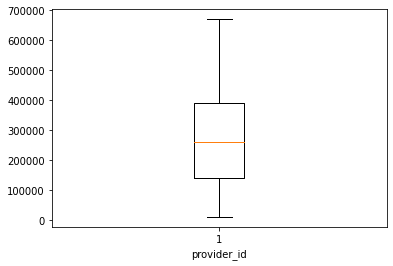

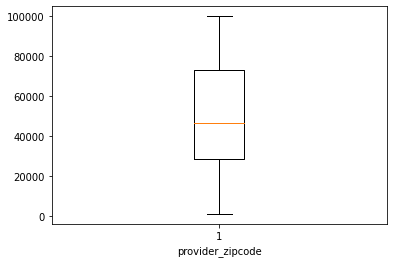

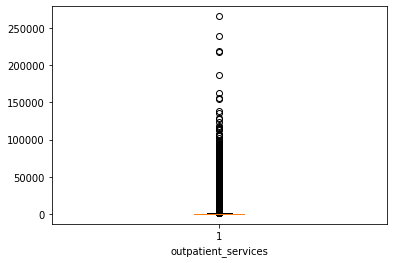

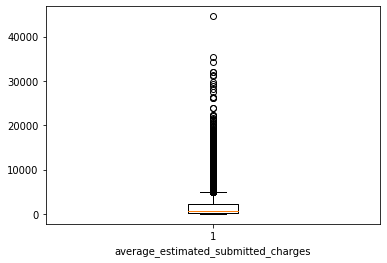

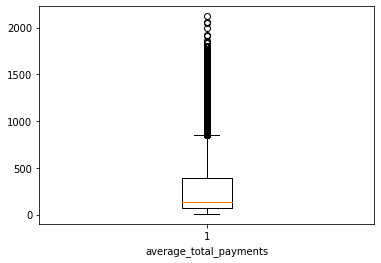

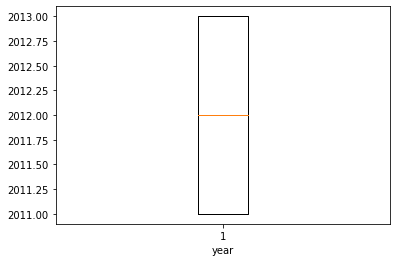

In [53]:
boxplots(out_numeric, df_outnumeric)

***CONCLUSIONS***

Similar to inpatient data, the skew suggest that the outliers are releveant data that can't be ignored since they are a large percentage of their respective columns. This could be due to their  continuous nature.

Additionally, provider_id 50599 which corresponds to UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER seems to be the most active proviser of inpatient services while zipcode 40202 which corresponds to LOUISVILLE city seems to be the city with the most inpatient services provided.

### b.) CATEGORICAL

**INPATIENT**

In [54]:
in_categoric

['provider_name',
 'provider_street_address',
 'provider_city',
 'provider_state',
 'hospital_referral_region_description',
 'icd_category']

In [55]:
df_incategoric = inpatient[in_categoric]
df_incategoric.head()

,provider_name,provider_street_address,provider_city,provider_state,hospital_referral_region_description,icd_category
0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,G81
1,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,T79
2,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,I02
3,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,D18
4,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,OK - Tulsa,P12


In [56]:
def categoric_counts(columns,data):
  for i in columns:
    print(i)
    print(data[i].value_counts())
    print("*******\n")

categoric_counts(in_categoric,df_incategoric)

provider_name
SAINT FRANCIS HOSPITAL, INC                        289
ST JOHN MEDICAL CENTER, INC                        287
ST JOSEPH'S HOSPITAL                               286
EAST TEXAS MEDICAL CENTER                          286
MEDICAL CENTER OF CENTRAL GEORGIA                  286
                                                  ... 
FLORENCE HOSPITAL AT ANTHEM, LLC                     2
ARIZONA ORTHOPEDIC AND SURGICAL SPECIALITY HOSP      2
EPIC MEDICAL CENTER                                  1
BEAR RIVER VALLEY HOSPITAL                           1
SOUTHWESTERN REGIONAL MEDICAL CENTER                 1
Name: provider_name, Length: 263, dtype: int64
*******

provider_street_address
6161 SOUTH YALE                      289
1923 SOUTH UTICA AVENUE              287
1000 SOUTH BECKHAM STREET            286
777 HEMLOCK STREET                   286
3001 W MARTIN LUTHER KING JR BLVD    286
                                    ... 
213 S WHITACRE/PO BOX 940              2
101 SOUTH MOOR

***CONCLUSION***

As descovered before, SAINT FRANCIS HOSPITAL INC is the most active provider name in terms of count on the dataset, however, TULSA is only the 2nd most active City. This could be due to the presence of multiple hospitals in MIAMI that will be investigated later.

Additionally, the most active state is Florida, which is where MIAMI CITY is, while the highest disease description is ICD J01

**OUTPATIENT**

In [57]:
out_categoric

['provider_name',
 'provider_street_address',
 'provider_city',
 'provider_state',
 'apc']

In [58]:
df_outcategoric = outpatient[out_categoric]
df_outcategoric.head()

,provider_name,provider_street_address,provider_city,provider_state,apc
0,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0013 - Level II Debridement & Destruction
1,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0015 - Level III Debridement & Destruction
2,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0020 - Level II Excision/ Biopsy
3,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0078 - Level III Pulmonary Treatment
4,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0096 - Level II Noninvasive Physiologic Studies


In [59]:
categoric_counts(out_categoric,df_outcategoric)

provider_name
GOOD SAMARITAN HOSPITAL                382
ST JOSEPH HOSPITAL                     325
ST JOSEPH MEDICAL CENTER               285
MERCY HOSPITAL                         265
MERCY MEDICAL CENTER                   265
                                      ... 
FIRST SURGICAL HOSPITAL                  1
PHYSICIAN'S CARE SURGICAL HOSPITAL       1
SURGICAL HOSPITAL OF PHOENIX, THE        1
LAFAYETTE GENERAL SURGICAL HOSPITAL      1
ANSON GENERAL HOSPITAL                   1
Name: provider_name, Length: 3428, dtype: int64
*******

provider_street_address
100 HOSPITAL DRIVE               198
1 MEDICAL CENTER DRIVE           144
800 WASHINGTON STREET            140
100 MEDICAL CENTER DRIVE         113
125 HOSPITAL DR                   94
                                ... 
1551 HWY 34 S                      1
1000 NUT TREE ROAD                 1
101 AVENUE J                       1
117 CAMINO DE VIDA                 1
117 CAMINO DE VIDA, SUITE 100      1
Name: provider_street_add

***CONCLUSION***

Similar to the numeric univariate analysis, GOOD SAMARITAN HOSPITAL is the most frequented provider for outpatient services. However, LOUIVILLE is not even in the top 5 cities as CHICAGO is and this could be due to CHICAGO having more hospitals, which will be investigated later.

Additionally, the most active state is Texas, which neither LOUIVILLE nor CHICAGO belong to. Whereas, the highest apc is 0267 - Level III Diagnostic and Screening Ultrasound 

## BIVARIATE ANALYSIS

### NUMERICAL-NUMERICAL

**INPATIENT**

In [60]:
df_inumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   provider_id                30000 non-null  int64  
 1   provider_zipcode           30000 non-null  int64  
 2   total_discharges           30000 non-null  int64  
 3   average_covered_charges    30000 non-null  float64
 4   average_total_payments     30000 non-null  float64
 5   average_medicare_payments  30000 non-null  float64
 6   year                       30000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 MB


In [61]:
df_inumeric.corr()

,provider_id,provider_zipcode,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,year
provider_id,1.000000,0.091791,-0.007702,-0.219911,-0.032023,-0.038808,0.018616
provider_zipcode,0.091791,1.000000,-0.031335,0.006924,-0.048606,-0.053374,0.019441
total_discharges,-0.007702,-0.031335,1.000000,-0.008876,-0.009749,-0.014568,-0.007202
average_covered_charges,-0.219911,0.006924,-0.008876,1.000000,0.777004,0.772434,0.042036
average_total_payments,-0.032023,-0.048606,-0.009749,0.777004,1.000000,0.984036,0.019344
average_medicare_payments,-0.038808,-0.053374,-0.014568,0.772434,0.984036,1.000000,0.003827
year,0.018616,0.019441,-0.007202,0.042036,0.019344,0.003827,1.000000


The columns that seem highly correlated are average_covered_charges & average_total_payments (0.77 - strong positive linear relationship), average_covered_charges & average_medicare_payments (0.77 - strong positive linear relationship), average_total_payments & average_medicare_payments (0.98 - strong positive linear relationship).



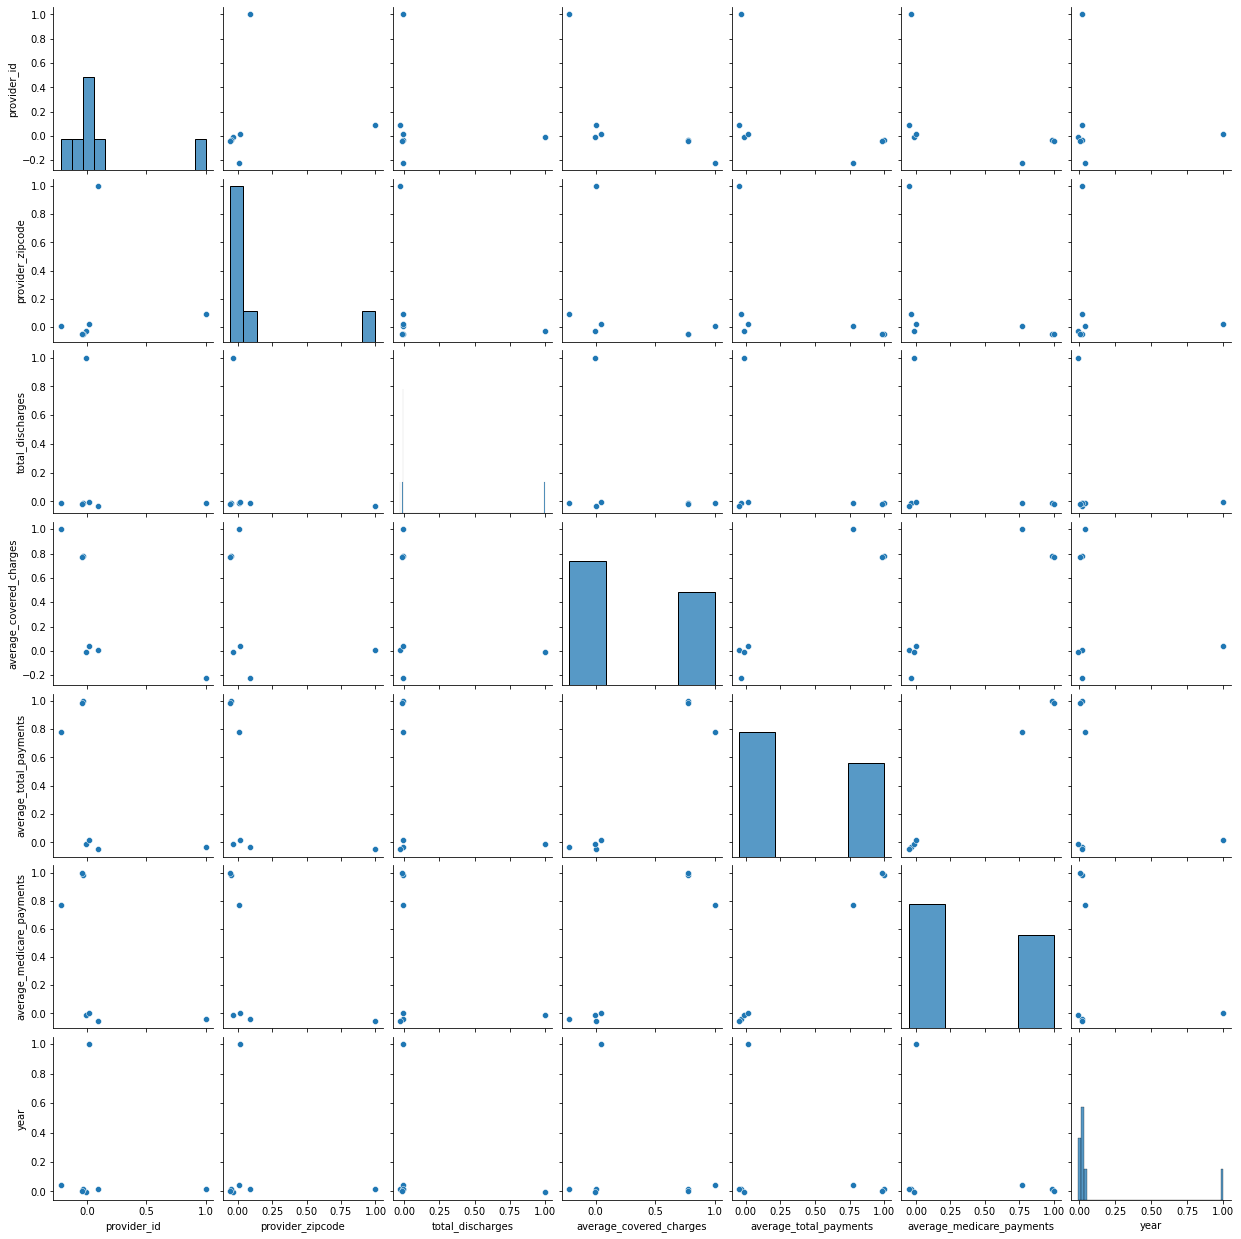

In [62]:
sns.pairplot(df_inumeric.corr())

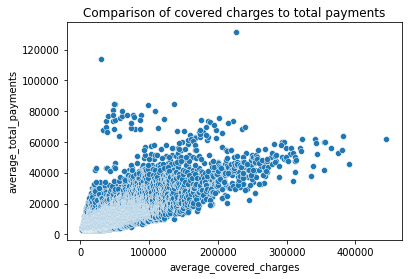

In [63]:
sns.scatterplot(x = df_inumeric["average_covered_charges"], y = df_inumeric["average_total_payments"])
plt.title("Comparison of covered charges to total payments")
plt.show()

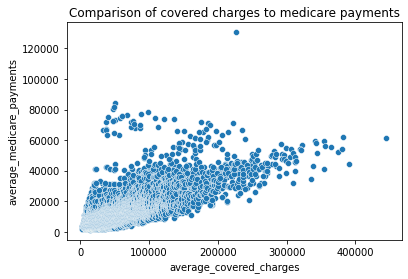

In [64]:
sns.scatterplot(x = df_inumeric["average_covered_charges"], y = df_inumeric["average_medicare_payments"])
plt.title("Comparison of covered charges to medicare payments")
plt.show()

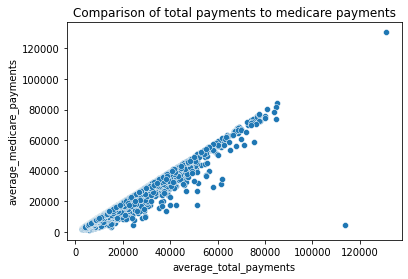

In [65]:
sns.scatterplot(x = df_inumeric["average_total_payments"], y = df_inumeric["average_medicare_payments"])
plt.title("Comparison of total payments to medicare payments")
plt.show()

The scatterplots confirm the relationships of the columns where the strongest one is average_total_payments to average_medicare_payments, suggesting that the more payments were made by the inpatients, the more medicare covered the costs.

Zipcode seems to be non related but this is because it is a categorical column (nominal data) that represents location, and could be investigated as part of the City and/or state for which each zipcode represents.

**OUTPATIENT**

In [66]:
df_outnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131510 entries, 0 to 131509
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   provider_id                          131510 non-null  int64  
 1   provider_zipcode                     131510 non-null  int64  
 2   outpatient_services                  131510 non-null  int64  
 3   average_estimated_submitted_charges  131510 non-null  float64
 4   average_total_payments               131510 non-null  float64
 5   year                                 131510 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 6.0 MB


In [67]:
df_outnumeric.corr()

,provider_id,provider_zipcode,outpatient_services,average_estimated_submitted_charges,average_total_payments,year
provider_id,1.000000,-0.133411,0.012505,-0.050622,-0.025278,-0.000918
provider_zipcode,-0.133411,1.000000,-0.013105,0.043434,0.002062,-0.001287
outpatient_services,0.012505,-0.013105,1.000000,-0.084354,-0.084949,0.018908
average_estimated_submitted_charges,-0.050622,0.043434,-0.084354,1.000000,0.753910,0.019323
average_total_payments,-0.025278,0.002062,-0.084949,0.753910,1.000000,-0.017391
year,-0.000918,-0.001287,0.018908,0.019323,-0.017391,1.000000


The only columns that show correlation are average_estimated_submitted_charges & average_total_payments (0.75 - strong positive linear realtionship)

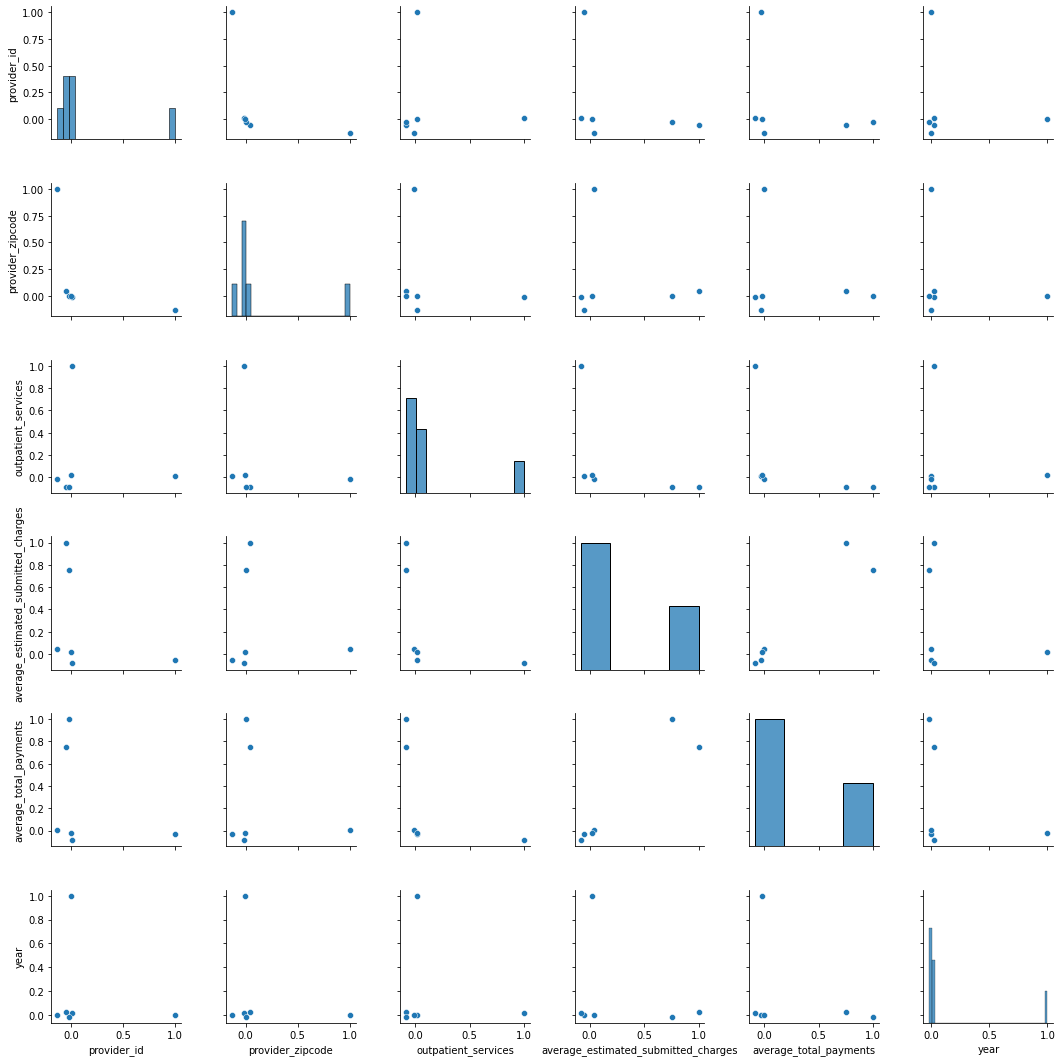

In [68]:
sns.pairplot(df_outnumeric.corr()) 


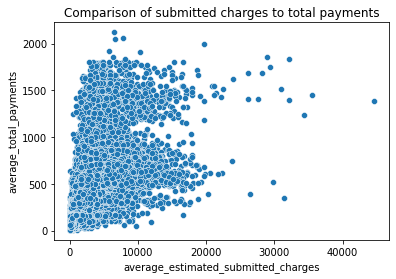

In [69]:
sns.scatterplot(x = df_outnumeric["average_estimated_submitted_charges"], y = df_outnumeric["average_total_payments"])
plt.title("Comparison of submitted charges to total payments")
plt.show()

The relationship is not that clear, however, in general, as average_estimated_submitted_charges increases, so does average_total_payments suggesting that the higher the charges the higher the total payments by outpatients, as expected logically.

### CATEGORICAL-CATEGORICAL

**INPATIENT**

In [70]:
df_incategoric.head()

,provider_name,provider_street_address,provider_city,provider_state,hospital_referral_region_description,icd_category
0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,G81
1,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,T79
2,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,I02
3,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,TX - Waco,D18
4,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,OK - Tulsa,P12


In [71]:
prov_by_state = df_incategoric.groupby(["provider_state"])["provider_name"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
prov_by_state.head()

,provider_state,provider_name,count
166,OK,"SAINT FRANCIS HOSPITAL, INC",289
167,OK,"ST JOHN MEDICAL CENTER, INC",287
22,FL,ST JOSEPH'S HOSPITAL,286
232,TX,EAST TEXAS MEDICAL CENTER,286
64,GA,MEDICAL CENTER OF CENTRAL GEORGIA,286


The top 5 hospitals and the states they belong to.

In [72]:
icd_by_state = df_incategoric.groupby(["icd_category"])["provider_state"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
icd_by_state.head()

,icd_category,provider_state,count
575,D31,FL,119
355,D18,FL,116
1565,P11,FL,116
19,A93,FL,115
1348,J01,FL,115


The top 5 icd_categories all come from the state of Florida

In [73]:
icd_by_city = df_incategoric.groupby(["icd_category"])["provider_city"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
icd_by_city.head()

,icd_category,provider_city,count
2508,D31,MIAMI,28
64,A93,MIAMI,25
6491,P11,MIAMI,25
1502,D18,MIAMI,25
5529,J01,MIAMI,25


The top 5 ICD categories come from MIAMI city.

**OUTPATIENT**

In [74]:
df_outcategoric.head()

,provider_name,provider_street_address,provider_city,provider_state,apc
0,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0013 - Level II Debridement & Destruction
1,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0015 - Level III Debridement & Destruction
2,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0020 - Level II Excision/ Biopsy
3,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0078 - Level III Pulmonary Treatment
4,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,0096 - Level II Noninvasive Physiologic Studies


In [75]:
by_state = df_outcategoric.groupby(["provider_state"])["provider_name"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
by_state.head()

,provider_state,provider_name,count
947,IL,ST MARYS HOSPITAL,162
2260,OH,GOOD SAMARITAN HOSPITAL,118
212,CA,GOOD SAMARITAN HOSPITAL,107
213,CA,ST JOSEPH HOSPITAL,96
1490,MI,BEAUMONT HEALTH SYSTEM,90


The top 5 hospitals

In [76]:
apc_by_state = df_outcategoric.groupby(["apc"])["provider_state"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
apc_by_state.head()

,apc,provider_state,count
877,0336 - Magnetic Resonance Imaging and Magnetic...,TX,766
727,0267 - Level III Diagnostic and Screening Ultr...,TX,761
728,0267 - Level III Diagnostic and Screening Ultr...,CA,736
777,0269 - Level II Echocardiogram Without Contrast,CA,724
778,0269 - Level II Echocardiogram Without Contrast,TX,718


The top 5 apc and the states relevant to them.

In [77]:
apc_by_city = df_outcategoric.groupby(["apc"])["provider_city"].value_counts().reset_index(name="count").sort_values(by="count",ascending=False)
apc_by_city.head()

,apc,provider_city,count
14899,0267 - Level III Diagnostic and Screening Ultr...,CHICAGO,75
16803,0269 - Level II Echocardiogram Without Contrast,CHICAGO,74
13098,0265 - Level I Diagnostic and Screening Ultras...,CHICAGO,71
23403,0377 - Level II Cardiac Imaging,CHICAGO,69
26711,0605 - Level 2 Hospital Clinic Visits,CHICAGO,65


The top 5 apc in terms of count come from CHICAGO

# DATA ANALYSIS

## 1. Average outpatient(inclusive of copayments) and inpatient medicare payments ranked per provider for each year of available data.

In [78]:
outpatient["patient"] = "outpatient"
inpatient["patient"] = "inpatient"

outpatient["cover_percentage"] = ((outpatient["average_estimated_submitted_charges"] - outpatient["average_total_payments"])/outpatient["average_estimated_submitted_charges"])*100
inpatient["cover_percentage"] = ((inpatient["average_covered_charges"] - inpatient["average_medicare_payments"])/inpatient["average_covered_charges"])*100

In [79]:
outpatient.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments,year,patient,cover_percentage
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032,2011,outpatient,84.767443
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068,2011,outpatient,65.179322
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429,2011,outpatient,90.256856
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000,2011,outpatient,82.100596
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294,2011,outpatient,86.020811


In [80]:
inpatient.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category,year,patient,cover_percentage
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.400000,2901.266667,2075.400000,G81,2011,inpatient,15.613564
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,35,2749.942857,4784.514286,4018.542857,T79,2011,inpatient,-46.131868
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,12,3133.583333,3579.583333,2738.583333,I02,2011,inpatient,12.605377
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,18,3282.277778,3790.166667,3214.222222,D18,2011,inpatient,2.073425
4,370171,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,74464,OK - Tulsa,11,3534.000000,6441.000000,5520.636364,P12,2011,inpatient,-56.214951


In [81]:
in_relevant = ["provider_id","provider_name","provider_street_address","provider_city","provider_state","provider_zipcode","year","patient", "cover_percentage"]
out_relevant = ["provider_id","provider_name","provider_street_address","provider_city","provider_state","provider_zipcode","year","patient", "cover_percentage"]

in_reldf = inpatient[in_relevant]
out_reldf = outpatient[out_relevant]

patients = [in_reldf,out_reldf]
patients = pd.concat(patients, ignore_index=True)
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161510 entries, 0 to 161509
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   provider_id              161510 non-null  int64  
 1   provider_name            161510 non-null  object 
 2   provider_street_address  161510 non-null  object 
 3   provider_city            161510 non-null  object 
 4   provider_state           161510 non-null  object 
 5   provider_zipcode         161510 non-null  int64  
 6   year                     161510 non-null  int64  
 7   patient                  161510 non-null  object 
 8   cover_percentage         161510 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 11.1+ MB


In [82]:
rankings = patients.groupby(['year',"provider_name"])["cover_percentage"].median().reset_index().sort_values(by="cover_percentage", ascending=False)

rankings

,year,provider_name,cover_percentage
3777,2012,FIRST SURGICAL HOSPITAL,96.465754
3552,2012,CORNERSTONE REGIONAL HOSPITAL,95.603869
765,2011,FIRST STREET HOSPITAL LP,95.581674
5602,2012,SUGAR LAND SURGICAL HOSPITAL LLP,95.566476
6859,2013,GARFIELD MEDICAL CENTER,95.340865
...,...,...,...
3300,2012,BRONX-LEBANON HOSPITAL CENTER,-8.877790
6552,2013,CONTRA COSTA REGIONAL MEDICAL CENTER,-13.582893
1313,2011,LINCOLN MEDICAL & MENTAL HEALTH CENTER,-25.363558
4318,2012,LINCOLN MEDICAL & MENTAL HEALTH CENTER,-25.437215


In [147]:
rankings_2011 = rankings[rankings["year"] == 2011]
rankings_2011["rank"] = rankings_2011["cover_percentage"].rank(ascending=False)
rankings_2011

,year,provider_name,cover_percentage,rank
765,2011,FIRST STREET HOSPITAL LP,95.581674,1.0
1489,2011,MEMORIAL HERMANN SURGICAL HOSPITAL KINGWOOD,95.051771,2.0
665,2011,EAST VALLEY HOSPITAL MEDICAL CENTER,94.593905,3.0
833,2011,GADSDEN REGIONAL MEDICAL CENTER,94.559188,4.0
802,2011,FORT WALTON BEACH MEDICAL CENTER,94.334873,5.0
...,...,...,...,...
1243,2011,LAKE WHITNEY MEDICAL CENTER,15.613564,3015.0
2876,2011,W W HASTINGS INDIAN HOSPITAL,12.980868,3016.0
277,2011,BRONX-LEBANON HOSPITAL CENTER,8.862749,3017.0
1769,2011,NORTHBAY VACAVALLEY HOSPITAL,1.351826,3018.0


In [148]:
rankings_2012 = rankings[rankings["year"] == 2012]
rankings_2012["rank"] = rankings_2012["cover_percentage"].rank(ascending=False)
rankings_2012

,year,provider_name,cover_percentage,rank
3777,2012,FIRST SURGICAL HOSPITAL,96.465754,1.0
3552,2012,CORNERSTONE REGIONAL HOSPITAL,95.603869,2.0
5602,2012,SUGAR LAND SURGICAL HOSPITAL LLP,95.566476,3.0
5719,2012,TOPS SURGICAL SPECIALTY HOSPITAL,95.283129,4.0
3845,2012,GADSDEN REGIONAL MEDICAL CENTER,94.907878,5.0
...,...,...,...,...
5302,2012,SHEEHAN MEMORIAL HOSPITAL,16.573016,3016.0
3533,2012,"COMMUNITY MEMORIAL HOSPITAL, INC",14.195695,3017.0
4248,2012,LAKE WHITNEY MEDICAL CENTER,7.157291,3018.0
3300,2012,BRONX-LEBANON HOSPITAL CENTER,-8.877790,3019.0


In [149]:
rankings_2013 = rankings[rankings["year"] == 2013]
rankings_2013["rank"] = rankings_2013["cover_percentage"].rank(ascending=False)
rankings_2013

,year,provider_name,cover_percentage,rank
6859,2013,GARFIELD MEDICAL CENTER,95.340865,1.0
6854,2013,GADSDEN REGIONAL MEDICAL CENTER,95.270575,2.0
7427,2013,MCKENZIE REGIONAL HOSPITAL,94.725595,3.0
6368,2013,CAPITAL HEALTH SYSTEM-FULD CAMPUS,94.721935,4.0
6207,2013,BARSTOW COMMUNITY HOSPITAL,94.671220,5.0
...,...,...,...,...
7312,2013,LINCOLN MEDICAL & MENTAL HEALTH CENTER,2.307363,2942.0
7525,2013,"MERCY HEALTH PARTNERS, MERCY CAMPUS",-1.126666,2943.0
6779,2013,FAXTON-ST LUKE'S HEALTHCARE,-3.970030,2944.0
6552,2013,CONTRA COSTA REGIONAL MEDICAL CENTER,-13.582893,2945.0


In [86]:
rankings_dfs = [rankings_2011,rankings_2012,rankings_2013]

df_rankings = pd.concat(rankings_dfs, ignore_index=True)
df_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              8985 non-null   int64  
 1   provider_name     8985 non-null   object 
 2   cover_percentage  8985 non-null   float64
 3   rank              8985 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 280.9+ KB


In [87]:
df_rankings.to_csv("Rankings.csv")

In [152]:
px.scatter(df_rankings, x="rank", y="cover_percentage", facet_col="year", log_x=True, hover_name="provider_name")

See Appendix I for sample image of visualization due to plotly express' challenge of displaying plots on GitHub.

## 2. Time series analysis on the average charge on different APC services per provider over the three years

In [89]:
outpatient.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,apc,outpatient_services,average_estimated_submitted_charges,average_total_payments,year,patient,cover_percentage
0,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0013 - Level II Debridement & Destruction,31,327.515806,49.889032,2011,outpatient,84.767443
1,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0015 - Level III Debridement & Destruction,936,299.867992,104.416068,2011,outpatient,65.179322
2,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0020 - Level II Excision/ Biopsy,14,5409.921429,527.096429,2011,outpatient,90.256856
3,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0078 - Level III Pulmonary Treatment,48,566.275833,101.360000,2011,outpatient,82.100596
4,30036,CHANDLER REGIONAL MEDICAL CENTER,475 SOUTH DOBSON ROAD,CHANDLER,AZ,85224,0096 - Level II Noninvasive Physiologic Studies,68,767.822059,107.335294,2011,outpatient,86.020811


In [90]:
outpatient["apc"].value_counts()

0267 - Level III Diagnostic and Screening Ultrasound                                     8931
0269 - Level II Echocardiogram Without Contrast                                          8645
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    8554
0265 - Level I Diagnostic and Screening Ultrasound                                       8166
0377 - Level II Cardiac Imaging                                                          7718
0078 - Level III Pulmonary Treatment                                                     7002
0604 - Level 1 Hospital Clinic Visits                                                    6605
0605 - Level 2 Hospital Clinic Visits                                                    6550
0368 - Level II Pulmonary Tests                                                          6260
0207 - Level III Nerve Injections                                                        5990
0209 - Level II Extended EEG, Sleep, and Cardiovascular Stud

In [91]:
df_apc = outpatient.groupby(['year','apc'])['average_estimated_submitted_charges'].median().reset_index()
df_apc

,year,apc,average_estimated_submitted_charges
0,2011,0012 - Level I Debridement & Destruction,62.790000
1,2011,0013 - Level II Debridement & Destruction,206.198683
2,2011,0015 - Level III Debridement & Destruction,308.356143
3,2011,0019 - Level I Excision/ Biopsy,1254.388163
4,2011,0020 - Level II Excision/ Biopsy,2737.809678
...,...,...,...
85,2013,0607 - Level 4 Hospital Clinic Visits,328.437113
86,2013,0608 - Level 5 Hospital Clinic Visits,386.560333
87,2013,0690 - Level I Electronic Analysis of Devices,141.651176
88,2013,0692 - Level II Electronic Analysis of Devices,525.593990


In [92]:
df_apc.to_csv("APC.csv")

In [93]:
px.line(df_apc, x="year", y="average_estimated_submitted_charges", color="apc")

See Appendix II for sample image of visualization due to plotly express' challenge of displaying plots on GitHub.

## 3. Geographical Analysis by state on affordable providers that offer emergency charges

In [94]:
general_info_csv.head().T

,0,1,2,3,4
provider_id,010018,010051,010102,030074,030136
hospital_name,CALLAHAN EYE HOSPITAL,GREENE COUNTY HOSPITAL,J PAUL JONES HOSPITAL,SELLS HOSPITAL,DIGNITY HEALTH - ARIZONA GENERAL HOSPITAL
address,"1720 UNIVERSITY BLVD, SUITE 500",509 WILSON AVENUE,317 MCWILLIAMS AVENUE,"HIGHWAY 86, AT TOPAWA ROAD",7171 SOUTH 51ST AVENUE
city,BIRMINGHAM,EUTAW,CAMDEN,SELLS,LAVEEN
state,AL,AL,AL,AZ,AZ
zip_code,35233,35462,36726,85634,85339
county_name,Jefferson,Greene,Wilcox,Pima,Maricopa
phone_number,(205) 325-8100,(205) 372-3388,(334) 682-4131,(520) 362-7003,(623) 584-5100
hospital_type,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals,Acute Care Hospitals
hospital_ownership,Voluntary non-profit - Private,Government - Local,Voluntary non-profit - Other,Tribal,Proprietary


In [95]:
emergency_service = general_info_csv[general_info_csv["emergency_services"] == True]
emergency_service.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 0 to 5335
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            4468 non-null   object 
 1   hospital_name                                          4468 non-null   object 
 2   address                                                4468 non-null   object 
 3   city                                                   4468 non-null   object 
 4   state                                                  4468 non-null   object 
 5   zip_code                                               4468 non-null   int64  
 6   county_name                                            4468 non-null   object 
 7   phone_number                                           4468 non-null   object 
 8   hospital_type                                   

In [96]:
rel_gencols = ["provider_id","hospital_name","address","city","state","zip_code"]
rel_gen = emergency_service[rel_gencols]
rel_gen.head()

,provider_id,hospital_name,address,city,state,zip_code
0,010018,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233
1,010051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462
2,010102,J PAUL JONES HOSPITAL,317 MCWILLIAMS AVENUE,CAMDEN,AL,36726
3,030074,SELLS HOSPITAL,"HIGHWAY 86, AT TOPAWA ROAD",SELLS,AZ,85634
6,030139,DIGNITY HEALTH ARIZONA GENERAL HOSPITAL,9130 EAST ELLIOT ROAD,MESA,AZ,85212


In [97]:
pat = list(patients["provider_name"])
rel_gen["hospital_name"].isin(pat).value_counts()

False    2510
True     1958
Name: hospital_name, dtype: int64

In [98]:
pat = list(patients["provider_state"])
rel_gen["state"].isin(pat).value_counts()

True     4367
False     101
Name: state, dtype: int64

In [99]:
patients.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,year,patient,cover_percentage
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,2011,inpatient,15.613564
1,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,2011,inpatient,-46.131868
2,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,2011,inpatient,12.605377
3,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,2011,inpatient,2.073425
4,370171,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,74464,2011,inpatient,-56.214951


In [100]:
rel_gen.rename(columns={'state':"provider_state","hospital_name":"provider_name","address":"provider_street_address","city":"provider_city","zip_code":"provider_zipcode"}, inplace=True)
rel_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 0 to 5335
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   provider_id              4468 non-null   object
 1   provider_name            4468 non-null   object
 2   provider_street_address  4468 non-null   object
 3   provider_city            4468 non-null   object
 4   provider_state           4468 non-null   object
 5   provider_zipcode         4468 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 244.3+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
pat = list(patients["provider_id"])
rel_gen["provider_id"].isin(pat).value_counts()

False    4468
Name: provider_id, dtype: int64

In [102]:
relevant_list = list(rel_gen["provider_name"])

In [103]:
emergency_available = patients[patients["provider_name"].isin(rel_gen["provider_name"])]
emergency_available.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97727 entries, 16 to 161509
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   provider_id              97727 non-null  int64  
 1   provider_name            97727 non-null  object 
 2   provider_street_address  97727 non-null  object 
 3   provider_city            97727 non-null  object 
 4   provider_state           97727 non-null  object 
 5   provider_zipcode         97727 non-null  int64  
 6   year                     97727 non-null  int64  
 7   patient                  97727 non-null  object 
 8   cover_percentage         97727 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 7.5+ MB


In [104]:
emergency_ranking = emergency_available.groupby(["provider_state"])["cover_percentage"].median().reset_index().sort_values(by="cover_percentage", ascending=False)
emergency_ranking["rank"] = emergency_ranking["cover_percentage"].rank(ascending=False)
emergency_ranking

,provider_state,cover_percentage,rank
9,FL,85.200263,1.0
3,AZ,82.871825,2.0
4,CA,82.570396,3.0
1,AL,82.429582,4.0
42,TX,81.890694,5.0
30,NJ,81.514006,6.0
41,TN,81.496299,7.0
14,IL,81.213163,8.0
5,CO,81.200436,9.0
39,SC,81.197146,10.0


In [105]:
emergency_ranking.to_csv("Geographic_Emergency.csv")

In [106]:
px.scatter(emergency_ranking, x="rank", y="cover_percentage",hover_name="provider_state")

See Appendix III for sample image of visualization due to plotly express' challenge of displaying plots on GitHub.

## 4. Analyze the top 10 prominent inpatient ICD10 diagnosis based on state using their ICD10 Chapter and Block Descriptions

In [146]:
import requests

token_endpoint = 'https://icdaccessmanagement.who.int/connect/token'
client_id = '418e3e12-3702-46ae-b90b-2ca7c57187fe_8e0546f9-06bf-4744-9e4f-f25be3d4cbf2'
client_secret = '/y/cifAEQFabFErLEMsYZgBc2mTUiGhEwaOflk068pg='
scope = 'icdapi_access'
grant_type = 'client_credentials'


# get the OAUTH2 token

# set data to post
payload = {'client_id': client_id, 
	   	   'client_secret': client_secret, 
           'scope': scope, 
           'grant_type': grant_type}
           
# make request
r = requests.post(token_endpoint, data=payload, verify=False).json()
token = r['access_token']


# access ICD API

uri = 'https://id.who.int/icd/entity'

# HTTP header fields to set
headers = {'Authorization':  'Bearer '+token, 
           'Accept': 'application/json', 
           'Accept-Language': 'en',
	   'API-Version': 'v2'}
           
# make request           
r = requests.get(uri, headers=headers, verify=False)

# print the result
print (r.text)	

{"@context":"http://id.who.int/icd/contexts/contextForTopLevel.json","@id":"http://id.who.int/icd/entity","title":{"@language":"en","@value":"International Classification of Diseases 11th Revision"},"releaseId":"2022-02","availableLanguages":["ar","en","es","fr","zh"],"releaseDate":"2022-02-07","child":["http://id.who.int/icd/entity/448895267"],"browserUrl":"NA"}


In [113]:
r.text

'{"@context":"http://id.who.int/icd/contexts/contextForTopLevel.json","@id":"http://id.who.int/icd/entity","title":{"@language":"en","@value":"International Classification of Diseases 11th Revision"},"releaseId":"2022-02","availableLanguages":["ar","en","es","fr","zh"],"releaseDate":"2022-02-07","child":["http://id.who.int/icd/entity/448895267"],"browserUrl":"NA"}'

In [110]:
inpatient["icd_category"].unique()

array(['G81', 'T79', 'I02', 'D18', 'P12', 'D22', 'B96', 'D31', 'D28',
       'B95', 'D29', 'R77', 'D86', 'R82', 'J03', 'L11', 'D26', 'I01',
       'J02', 'I60', 'R79', 'F50', 'I69', 'F90', 'Y07', 'I66', 'G82',
       'I63', 'J01', 'I67', 'G80', 'D19', 'P11', 'D16', 'F53', 'B97',
       'F52', 'D13', 'D17', 'R73', 'D10', 'J05', 'R74', 'A93', 'D11',
       'I65', 'R78', 'B98', 'P15', 'D36', 'F51', 'Y06', 'A96', 'L13',
       'P10', 'I62', 'R94', 'A95', 'R70', 'D20', 'F98', 'A97', 'F92',
       'D23', 'R90', 'D15', 'D21', 'D30', 'D33', 'F93', 'D81', 'F94',
       'R76', 'D25', 'D35', 'J06', 'D14', 'A92', 'I68', 'D64', 'A98',
       'D12', 'F95', 'D61', 'G83', 'D32', 'J04', 'D60', 'L10', 'D83',
       'P14', 'P13', 'D63', 'F91', 'I61', 'R93', 'L12', 'D82', 'D80',
       'D89'], dtype=object)

In [111]:
import pandas as pd
from tqdm import tqdm

In [112]:
def clean_label(df):
    df['label'] = df['label'].replace(df.at['ID'], '').strip()
    return df['label']

YEAR  = '2019'

In [113]:
print('RUN LV0')
ICDTree1 = pd.read_json(f'https://icd.who.int/browse10/{YEAR}/en/JsonGetRootConcepts?useHtml=false')

RUN LV0


In [114]:
ICDTree1['label'] = ICDTree1.apply(clean_label, axis=1)

In [115]:
# LV1
ICDTree2list = []
for lv1 in tqdm(ICDTree1.index, ascii=True, desc='RUN LV1'):
    ICDTree2raw = pd.read_json(
        'https://icd.who.int/browse10/{}/en/JsonGetChildrenConcepts?ConceptId={}&useHtml=false&showAdoptedChildren=true'.format(
            YEAR, ICDTree1.at[lv1, "ID"]))
    ICDTree2raw['LV1_ID'] = ICDTree1.at[lv1, 'ID']
    ICDTree2raw['LV1_label'] = ICDTree1.at[lv1, 'label']
    ICDTree2list.extend(ICDTree2raw.to_dict('r'))
ICDTree2 = pd.DataFrame(ICDTree2list)
ICDTree2['label'] = ICDTree2.apply(clean_label, axis=1)

RUN LV1:   0%|          | 0/22 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

RUN LV1: 100%|##########| 22/22 [00:07<00:00,  2.82it/s]


In [116]:
# LV2
ICDTree3list = []
for lv1 in tqdm(ICDTree2.index, ascii=True, desc='RUN LV2'):
    ICDTree3raw = pd.read_json(
        'https://icd.who.int/browse10/{}/en/JsonGetChildrenConcepts?ConceptId={}&useHtml=false&showAdoptedChildren=true'.format(
            YEAR,ICDTree2.at[lv1, "ID"]))
    ICDTree3raw['LV1_ID'] = ICDTree2.at[lv1, 'LV1_ID']
    ICDTree3raw['LV1_label'] = ICDTree2.at[lv1, 'LV1_label']
    ICDTree3raw['LV2_ID'] = ICDTree2.at[lv1, 'ID']
    ICDTree3raw['LV2_label'] = ICDTree2.at[lv1, 'label']
    ICDTree3list.extend(ICDTree3raw.to_dict('r'))
ICDTree3 = pd.DataFrame(ICDTree3list)
ICDTree3['label'] = ICDTree3.apply(clean_label, axis=1)

RUN LV2:   0%|          | 0/211 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

RUN LV2: 100%|##########| 211/211 [01:14<00:00,  2.83it/s]


In [117]:
# LV3
ICDTree4list = []
for lv1 in tqdm(ICDTree3.index, ascii=True, desc='RUN LV3'):
    ICDTree4raw = pd.read_json(
        'https://icd.who.int/browse10/{}/en/JsonGetChildrenConcepts?ConceptId={}&useHtml=false&showAdoptedChildren=true'.format(
            YEAR,ICDTree3.at[lv1, "ID"]))
    ICDTree4raw['LV1_ID'] = ICDTree3.at[lv1, 'LV1_ID']
    ICDTree4raw['LV1_label'] = ICDTree3.at[lv1, 'LV1_label']
    ICDTree4raw['LV2_ID'] = ICDTree3.at[lv1, 'LV2_ID']
    ICDTree4raw['LV2_label'] = ICDTree3.at[lv1, 'LV2_label']
    ICDTree4raw['LV3_ID'] = ICDTree3.at[lv1, 'ID']
    ICDTree4raw['LV3_label'] = ICDTree3.at[lv1, 'label']
    ICDTree4list.extend(ICDTree4raw.to_dict('r'))
ICDTree4 = pd.DataFrame(ICDTree4list)
ICDTree4['label'] = ICDTree4.apply(clean_label, axis=1)
ICDTree4.rename({'ID': 'LV4_ID', 'label': 'LV4_label'}, axis=1, inplace=True)

RUN LV3:   0%|          | 0/1660 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

RUN LV3: 100%|##########| 1660/1660 [09:37<00:00,  2.88it/s]


In [119]:
ICDTree4

,Suggested,LV4_ID,LV4_label,isLeaf,isAdoptedChild,averageDepth,breadthValue,LV1_ID,LV1_label,LV2_ID,LV2_label,LV3_ID,LV3_label
0,,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol...",True,False,3,0.5,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
1,,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor",True,False,3,0.5,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
2,,A00.9,"Cholera, unspecified",True,False,3,0.5,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
3,,A01.0,Typhoid fever,True,False,3,0.5,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers
4,,A01.1,Paratyphoid fever A,True,False,3,0.5,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,,U84.2,Resistance to antiviral drug(s),True,False,3,0.5,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs
8250,,U84.3,Resistance to tuberculostatic drug(s),True,False,3,0.5,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs
8251,,U84.7,Resistance to multiple antimicrobial drugs,True,False,3,0.5,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs
8252,,U84.8,Resistance to other specified antimicrobial drug,True,False,3,0.5,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs


In [120]:
ICDTree4[['LV1_ID', 'LV1_label', 'LV2_ID', 'LV2_label', 'LV3_ID', 'LV3_label', 'LV4_ID', 'LV4_label']]

,LV1_ID,LV1_label,LV2_ID,LV2_label,LV3_ID,LV3_label,LV4_ID,LV4_label
0,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera,A00.9,"Cholera, unspecified"
3,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers,A01.0,Typhoid fever
4,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers,A01.1,Paratyphoid fever A
...,...,...,...,...,...,...,...,...
8249,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs,U84.2,Resistance to antiviral drug(s)
8250,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs,U84.3,Resistance to tuberculostatic drug(s)
8251,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs,U84.7,Resistance to multiple antimicrobial drugs
8252,XXII,Codes for special purposes,U82-U85,Resistance to antimicrobial and antineoplastic...,U84,Resistance to other antimicrobial drugs,U84.8,Resistance to other specified antimicrobial drug


In [122]:
chap_block = ICDTree4[['LV1_ID', 'LV1_label', 'LV2_ID', 'LV2_label', 'LV3_ID', 'LV3_label', 'LV4_ID', 'LV4_label']]
chap_block.to_csv("Chapter_and_Block_Descriptions.csv")

In [125]:
inpatient["icd_category"].dtype
chap_block = chap_block.drop(columns=["LV4_ID","LV4_label"])
chap_block.head()

,LV1_ID,LV1_label,LV2_ID,LV2_label,LV3_ID,LV3_label
0,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
1,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
2,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A00,Cholera
3,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers
4,I,Certain infectious and parasitic diseases,A00-A09,Intestinal infectious diseases,A01,Typhoid and paratyphoid fevers


In [128]:
chap_block["LV3_ID"].isin(inpatient["icd_category"]).value_counts()

False    7647
True      607
Name: LV3_ID, dtype: int64

In [130]:
icd_exists = chap_block[chap_block["LV3_ID"].isin(inpatient["icd_category"])]
icd_exists

,LV1_ID,LV1_label,LV2_ID,LV2_label,LV3_ID,LV3_label
349,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
350,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
351,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
352,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
353,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
...,...,...,...,...,...,...
7461,XX,External causes of morbidity and mortality,X85-Y09,Assault,Y07,Other maltreatment
7462,XX,External causes of morbidity and mortality,X85-Y09,Assault,Y07,Other maltreatment
7463,XX,External causes of morbidity and mortality,X85-Y09,Assault,Y07,Other maltreatment
7464,XX,External causes of morbidity and mortality,X85-Y09,Assault,Y07,Other maltreatment


In [133]:
icd_count = icd_exists.groupby(['LV1_ID',	'LV1_label',	'LV2_ID',	'LV2_label',	'LV3_ID',	'LV3_label'], as_index=False).count()
print(icd_count["LV3_ID"].value_counts())
icd_count

A92    1
F94    1
J04    1
J03    1
J02    1
      ..
D32    1
D31    1
D30    1
D29    1
Y07    1
Name: LV3_ID, Length: 100, dtype: int64


,LV1_ID,LV1_label,LV2_ID,LV2_label,LV3_ID,LV3_label
0,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A92,Other mosquito-borne viral fevers
1,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A93,"Other arthropod-borne viral fevers, not elsewh..."
2,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A95,Yellow fever
3,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A96,Arenaviral haemorrhagic fever
4,I,Certain infectious and parasitic diseases,A92-A99,Arthropod-borne viral fevers and viral haemorr...,A97,Dengue
...,...,...,...,...,...,...
95,XVIII,"Symptoms, signs and abnormal clinical and labo...",R90-R94,Abnormal findings on diagnostic imaging and in...,R90,Abnormal findings on diagnostic imaging of cen...
96,XVIII,"Symptoms, signs and abnormal clinical and labo...",R90-R94,Abnormal findings on diagnostic imaging and in...,R93,Abnormal findings on diagnostic imaging of oth...
97,XVIII,"Symptoms, signs and abnormal clinical and labo...",R90-R94,Abnormal findings on diagnostic imaging and in...,R94,Abnormal results of function studies
98,XX,External causes of morbidity and mortality,X85-Y09,Assault,Y06,Neglect and abandonment


In [134]:
icd_count.rename(columns={'LV3_ID':"icd_category","LV3_label":"disease_name"}, inplace=True)
icd_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LV1_ID        100 non-null    object
 1   LV1_label     100 non-null    object
 2   LV2_ID        100 non-null    object
 3   LV2_label     100 non-null    object
 4   icd_category  100 non-null    object
 5   disease_name  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [135]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           30000 non-null  int64  
 1   provider_name                         30000 non-null  object 
 2   provider_street_address               30000 non-null  object 
 3   provider_city                         30000 non-null  object 
 4   provider_state                        30000 non-null  object 
 5   provider_zipcode                      30000 non-null  int64  
 6   hospital_referral_region_description  30000 non-null  object 
 7   total_discharges                      30000 non-null  int64  
 8   average_covered_charges               30000 non-null  float64
 9   average_total_payments                30000 non-null  float64
 10  average_medicare_payments             30000 non-null  float64
 11  icd_category   

In [136]:
inpatient_icd = inpatient.copy()

In [139]:
icd_inpatient = pd.merge(inpatient_icd, icd_count, how='inner', on = 'icd_category')
icd_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           30000 non-null  int64  
 1   provider_name                         30000 non-null  object 
 2   provider_street_address               30000 non-null  object 
 3   provider_city                         30000 non-null  object 
 4   provider_state                        30000 non-null  object 
 5   provider_zipcode                      30000 non-null  int64  
 6   hospital_referral_region_description  30000 non-null  object 
 7   total_discharges                      30000 non-null  int64  
 8   average_covered_charges               30000 non-null  float64
 9   average_total_payments                30000 non-null  float64
 10  average_medicare_payments             30000 non-null  float64
 11  icd_category   

In [140]:
icd_inpatient.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category,year,patient,cover_percentage,LV1_ID,LV1_label,LV2_ID,LV2_label,disease_name
0,450270,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692,TX - Waco,15,2459.400000,2901.266667,2075.400000,G81,2011,inpatient,15.613564,VI,Diseases of the nervous system,G80-G83,Cerebral palsy and other paralytic syndromes,Hemiplegia
1,450754,HAMILTON GENERAL HOSPITAL,400 N BROWN,HAMILTON,TX,76531,TX - Waco,28,5223.285714,2985.285714,2189.285714,G81,2011,inpatient,58.086043,VI,Diseases of the nervous system,G80-G83,Cerebral palsy and other paralytic syndromes,Hemiplegia
2,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,NY,10451,NY - Bronx,94,5538.255319,8049.936170,7255.946809,G81,2011,inpatient,-31.015029,VI,Diseases of the nervous system,G80-G83,Cerebral palsy and other paralytic syndromes,Hemiplegia
3,330277,CORNING HOSPITAL,176 DENISON PARKWAY EAST,CORNING,NY,14830,PA - Sayre,23,7143.652174,3181.956522,2450.652174,G81,2011,inpatient,65.694688,VI,Diseases of the nervous system,G80-G83,Cerebral palsy and other paralytic syndromes,Hemiplegia
4,370065,CRAIG GENERAL HOSPITAL,735 NORTH FOREMAN,VINITA,OK,74301,OK - Tulsa,25,7201.240000,3262.200000,2544.120000,G81,2011,inpatient,64.671084,VI,Diseases of the nervous system,G80-G83,Cerebral palsy and other paralytic syndromes,Hemiplegia


In [144]:
icd_rank = icd_inpatient.groupby(["provider_state","icd_category","disease_name"])["total_discharges"].sum().reset_index().sort_values(by="total_discharges", ascending=False)
icd_rank.head(10)

,provider_state,icd_category,disease_name,total_discharges
307,FL,T79,"Certain early complications of trauma, not els...",15916
241,FL,D33,Benign neoplasm of brain and other parts of ce...,13106
291,FL,P11,Other birth injuries to central nervous system,12775
228,FL,D18,"Haemangioma and lymphangioma, any site",11646
239,FL,D31,Benign neoplasm of eye and adnexa,11461
211,FL,A93,"Other arthropod-borne viral fevers, not elsewh...",9181
309,FL,Y07,Other maltreatment,9096
1104,NE,D33,Benign neoplasm of brain and other parts of ce...,8126
1502,OK,D33,Benign neoplasm of brain and other parts of ce...,8064
269,FL,I01,Rheumatic fever with heart involvement,7695


In [145]:
icd_rank.to_csv("ICD.csv")

# CONCLUSION

Better Visualizations of the questions posed are available on the following Tableau Links: 

Page 1: https://public.tableau.com/views/ICD_Analysis/ICDDashboard?:language=en-GB&:display_count=n&:origin=viz_share_link - Questions 2 & 4 Visualizations.

Page 2: https://public.tableau.com/views/ICD_Analysis_Page_2/RankDashboard?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link - Questions 1 & 3 Visualizations.

# APPENDICES

## Appendix I: Sample Image Plot of Question 1

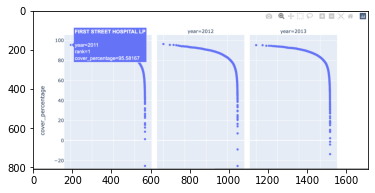

In [153]:
from matplotlib import image

img = image.imread("/content/Rankings_per_Year.png")
plt.imshow(img)
plt.show()

## Appendix II: Sample Image Plot of Question 2

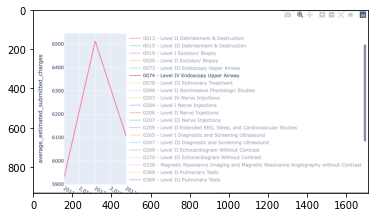

In [154]:
img = image.imread("/content/APC.png")
plt.imshow(img)
plt.show()

## Appendix III: Sample Image Plot of Question 3

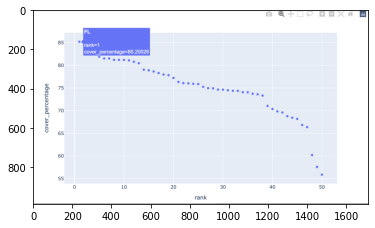

In [155]:
img = image.imread("/content/State_Rank.png")
plt.imshow(img)
plt.show()